In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# **Load Dataset**

In [3]:
# Load final cleaned dataset
df = pd.read_csv("looker_dataset.csv")

In [4]:
df.head()

,inventory_item_id,product_id,stocked_at,order_items_id,order_id,sold_at,cost,category,name,brand,retail_price,department,sku,user_id,age,gender,country,revenue,profit,profit_margin
0,67971,13844,2022-07-02 07:09:20+00:00,NaN,NaN,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,NaN,NaN,NaN,NaN,6.99,4.22196,0.604
1,67972,13844,2023-12-20 03:28:00+00:00,NaN,NaN,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,NaN,NaN,NaN,NaN,6.99,4.22196,0.604
2,67973,13844,2023-06-04 02:53:00+00:00,25190.0,17428.0,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,13873.0,38.0,F,United States,6.99,4.22196,0.604
3,72863,13844,2021-10-16 22:58:52+00:00,NaN,NaN,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,NaN,NaN,NaN,NaN,6.99,4.22196,0.604
4,72864,13844,2021-08-07 16:33:00+00:00,27016.0,18686.0,2021-11-22 02:19:52+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,14870.0,36.0,F,China,6.99,4.22196,0.604


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97018 entries, 0 to 97017
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   inventory_item_id  97018 non-null  int64  
 1   product_id         97018 non-null  int64  
 2   stocked_at         97018 non-null  object 
 3   order_items_id     30766 non-null  float64
 4   order_id           30766 non-null  float64
 5   sold_at            30766 non-null  object 
 6   cost               96980 non-null  float64
 7   category           96979 non-null  object 
 8   name               96979 non-null  object 
 9   brand              96979 non-null  object 
 10  retail_price       96979 non-null  float64
 11  department         96979 non-null  object 
 12  sku                96979 non-null  object 
 13  user_id            30766 non-null  float64
 14  age                30766 non-null  float64
 15  gender             30766 non-null  object 
 16  country            307

In [6]:
df_analysis = df.copy()

# **1. How has Looker E-Commerce performed over time in terms of profitability?**

<ipython-input-496-9e5602335731>:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_analysis['month'] = df_analysis['sold_at'].dt.to_period('M').astype(str)


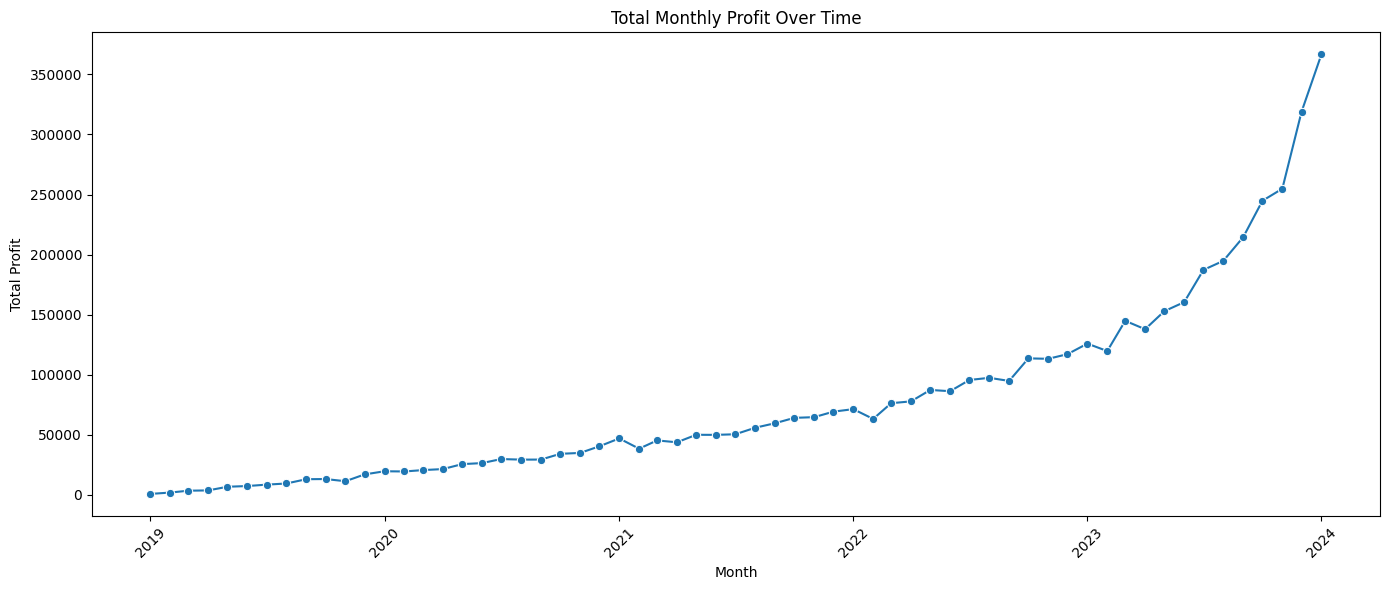

In [ ]:
# Safely parse 'sold_at' using mixed format handling
df_analysis['sold_at'] = pd.to_datetime(df_analysis['sold_at'], format='mixed', errors='coerce')

# Drop any rows where sold_at couldn't be parsed
df_analysis = df_analysis.dropna(subset=['sold_at'])

# Extract the month in 'YYYY-MM' format
df_analysis['month'] = df_analysis['sold_at'].dt.to_period('M').astype(str)

# Group by month to calculate total profit
monthly_profit = df_analysis.groupby('month').agg(
    total_profit=('profit', 'sum')
).reset_index()

# Sort by chronological month
monthly_profit['month'] = pd.to_datetime(monthly_profit['month'])
monthly_profit = monthly_profit.sort_values('month')

# Plot: Monthly profit trend
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_profit, x='month', y='total_profit', marker='o')
plt.title('Total Monthly Profit Over Time')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **2. Which country contributes the most revenue, profit, and sales to Looker E-Commerce?**


In [ ]:
# Group by country and sum profit
df_country = df.copy()

# Create a mapping of country names that need to be unified
country_mapping = {
    'España': 'Spain',
    'Deutschland': 'Germany'
}

# Replace country names based on the mapping
df_country['country'] = df_country['country'].replace(country_mapping)

# Group by country and sum profit
country_profit = df_country.groupby('country').agg(
    total_profit=('profit', 'sum'),
    total_revenue=('revenue', 'sum'),
    total_sales=('order_items_id', 'count')
).reset_index().sort_values(by='total_profit', ascending=False)

# Display the result
print(country_profit)


NameError: name 'df' is not defined

<ipython-input-498-922c2c248e01>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_profit', y='country', data=country_profit.head(8), palette='crest')


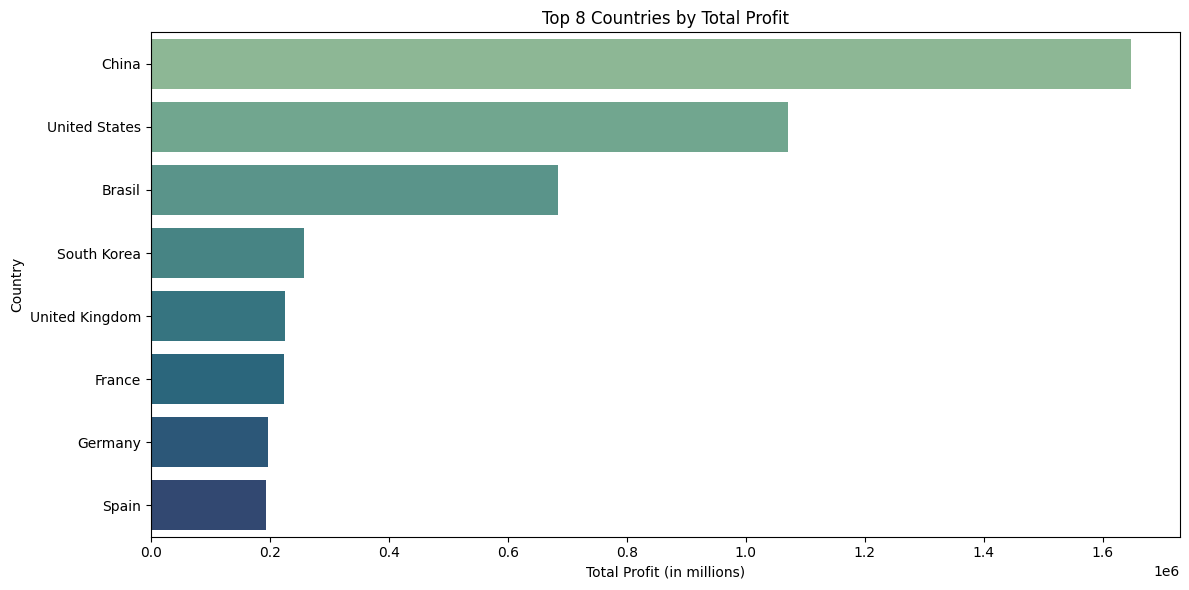

In [ ]:
# Bar plot for top 8 countries
plt.figure(figsize=(12, 6))
sns.barplot(x='total_profit', y='country', data=country_profit.head(8), palette='crest')
plt.title('Top 8 Countries by Total Profit')
plt.xlabel('Total Profit (in millions)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

<ipython-input-499-2c94f2d270f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_profit', y='country', data=country_profit.tail(10), palette='flare')


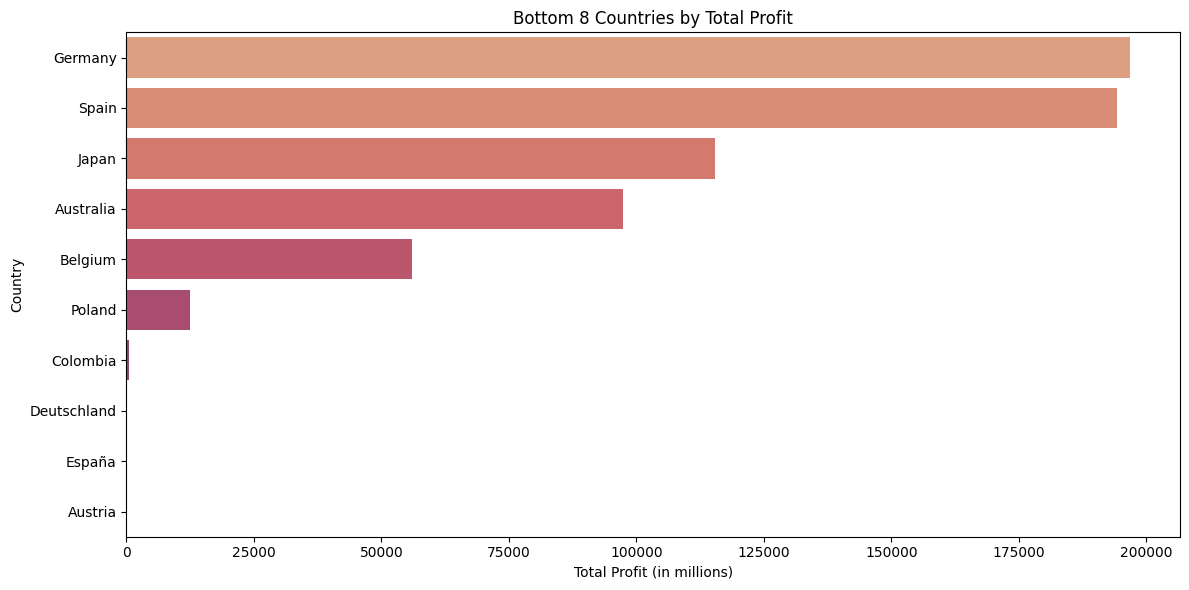

In [ ]:
# Bottom 8 countries
plt.figure(figsize=(12, 6))
sns.barplot(x='total_profit', y='country', data=country_profit.tail(8), palette='flare')
plt.title('Bottom 8 Countries by Total Profit')
plt.xlabel('Total Profit (in millions)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

<ipython-input-500-82429783a327>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y='country', data=country_profit.head(8), palette='crest')


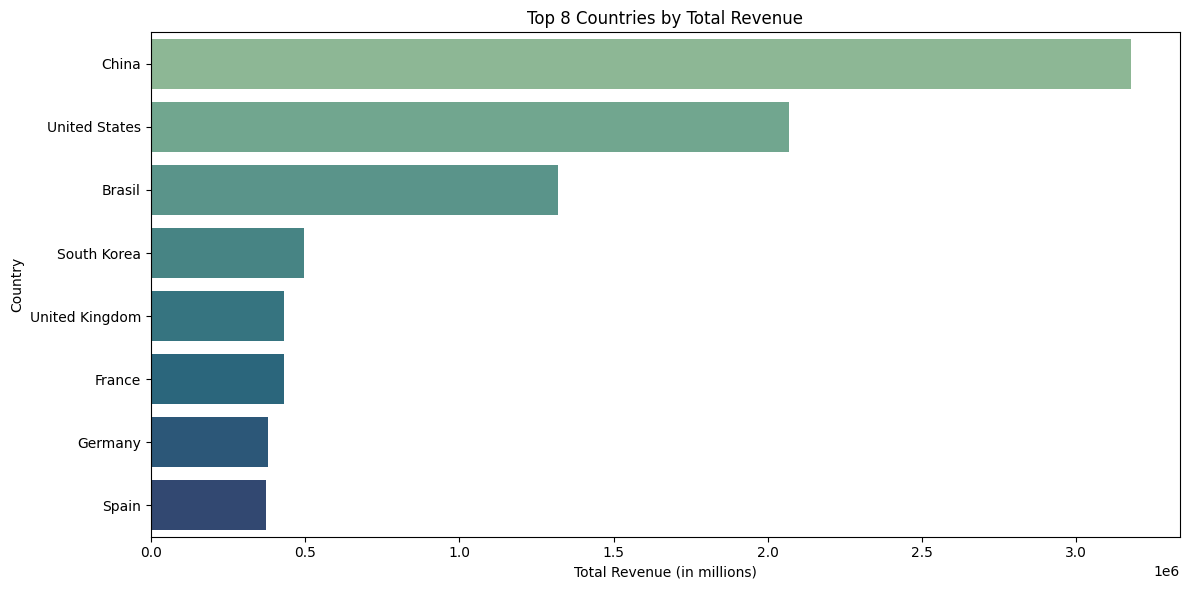

In [ ]:
# Bar plot for top 8 countries
plt.figure(figsize=(12, 6))
sns.barplot(x='total_revenue', y='country', data=country_profit.head(8), palette='crest')
plt.title('Top 8 Countries by Total Revenue')
plt.xlabel('Total Revenue (in millions)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

<ipython-input-501-e393c51c3c00>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y='country', data=country_profit.tail(8), palette='crest')


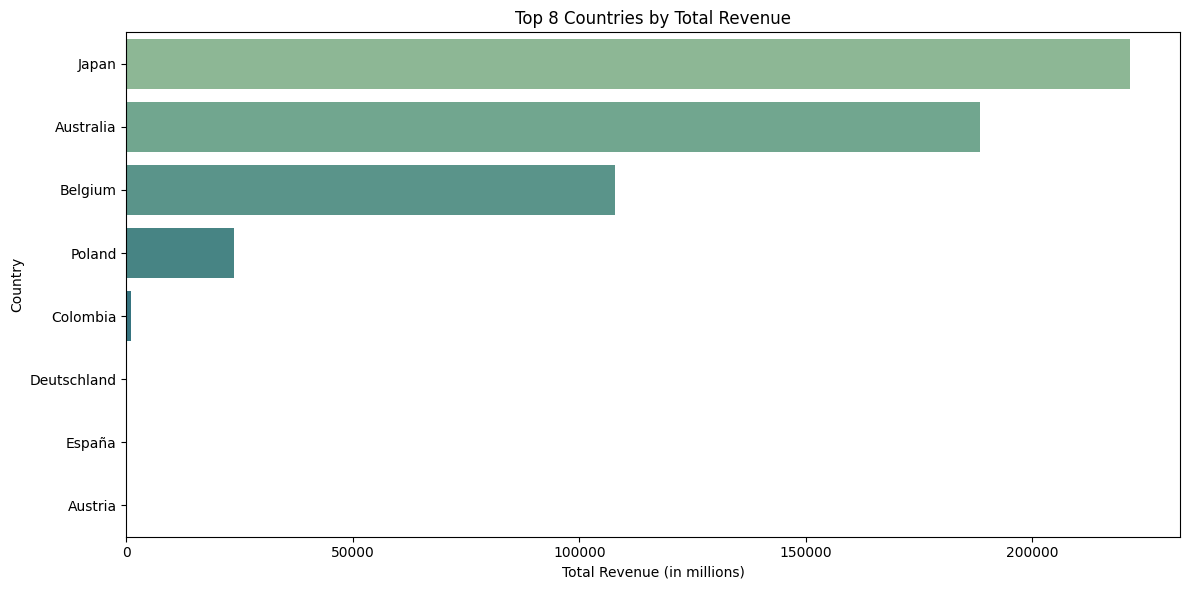

In [ ]:
# Bar plot for bottom 8 countries
plt.figure(figsize=(12, 6))
sns.barplot(x='total_revenue', y='country', data=country_profit.tail(8), palette='flare')
plt.title('Bottom 8 Countries by Total Revenue')
plt.xlabel('Total Revenue (in millions)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

<ipython-input-502-a383addc8c9a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales', y='country', data=country_profit.head(8), palette='crest')


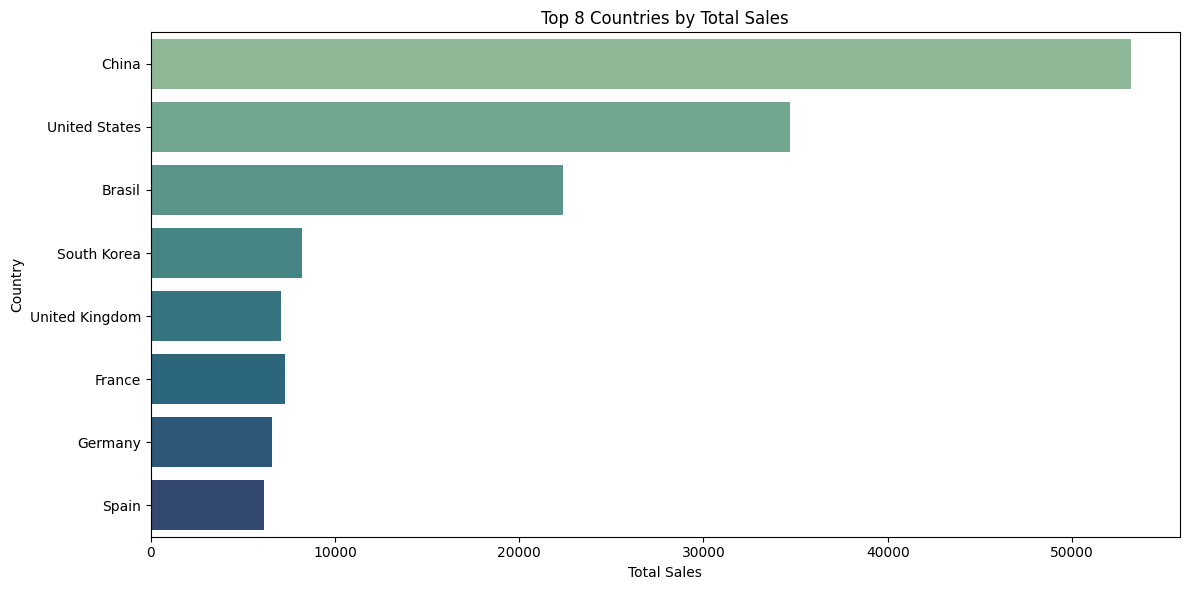

In [ ]:
# Bar plot for top 8 countries
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='country', data=country_profit.head(8), palette='crest')
plt.title('Top 8 Countries by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

<ipython-input-503-54af63ca75f7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales', y='country', data=country_profit.tail(8), palette='crest')


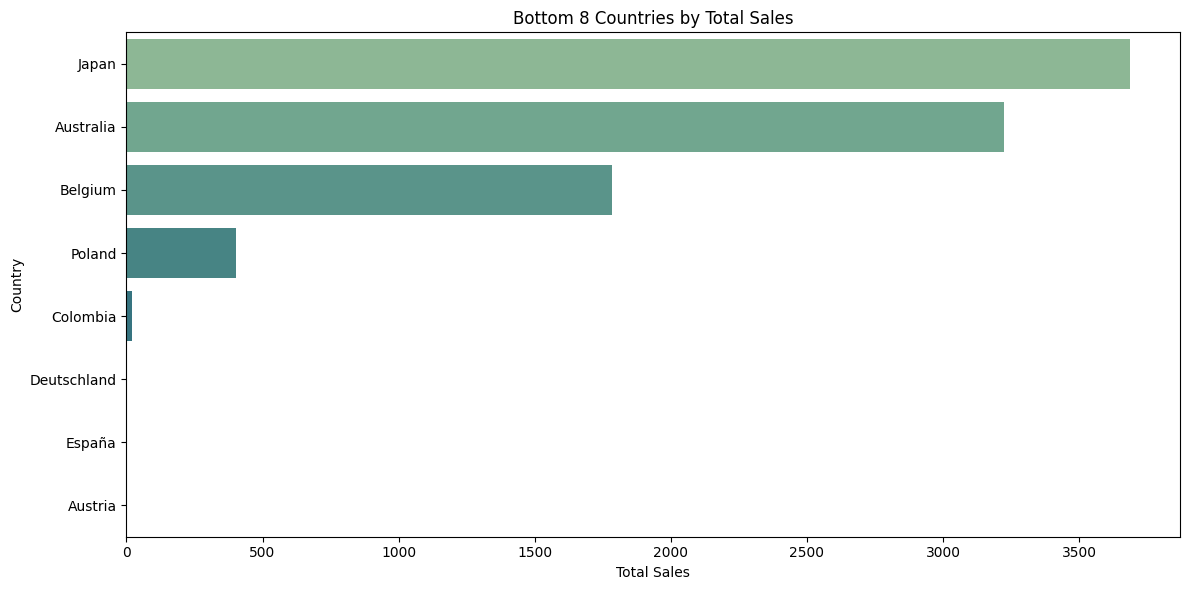

In [ ]:
# Bar plot for bottom 8 countries
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='country', data=country_profit.tail(8), palette='flare')
plt.title('Bottom 8 Countries by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# **3. What are the customer profiles: Do user attributes such as gender and age correlate with higher spending or profitability?**


In [ ]:
# Group by gender
gender_profile = df.groupby('gender').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    user_count=('user_id', 'nunique')
).reset_index()

In [ ]:
# Define age brackets
bins = [0, 17, 24, 34, 44, 54, 64, 120]
labels = ['<18', '18–24', '25–34', '35–44', '45–54', '55–64', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Group by age group
age_profile = df.groupby('age_group').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    user_count=('user_id', 'nunique')
).reset_index()

<ipython-input-505-0070fb296514>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_profile = df.groupby('age_group').agg(


<ipython-input-506-d90342936174>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_profile, x='gender', y='total_profit', palette='pastel')


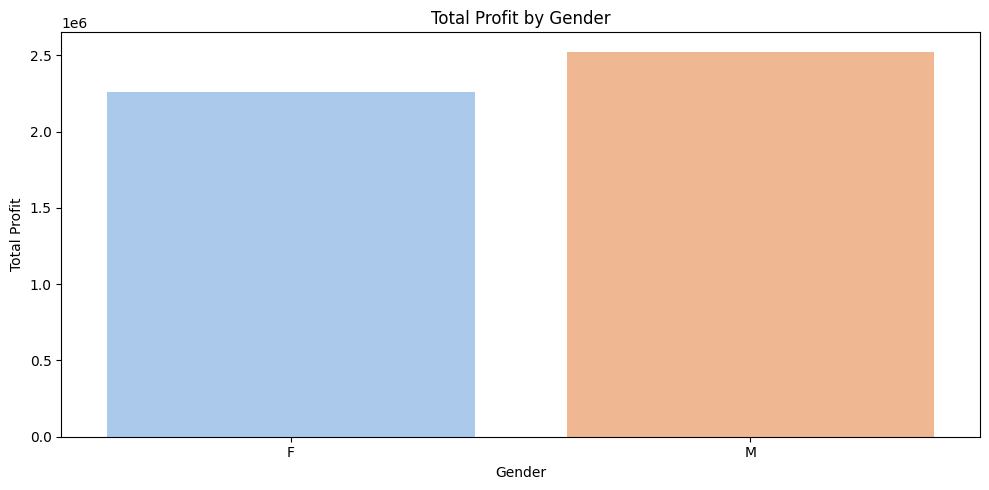

In [ ]:
# PLOT 1: Gender Profile (Barplot)
plt.figure(figsize=(10, 5))
sns.barplot(data=gender_profile, x='gender', y='total_profit', palette='pastel')
plt.title('Total Profit by Gender')
plt.ylabel('Total Profit')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

<ipython-input-507-41d3a8088b58>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_profile, x='age_group', y='total_profit', palette='Set2')


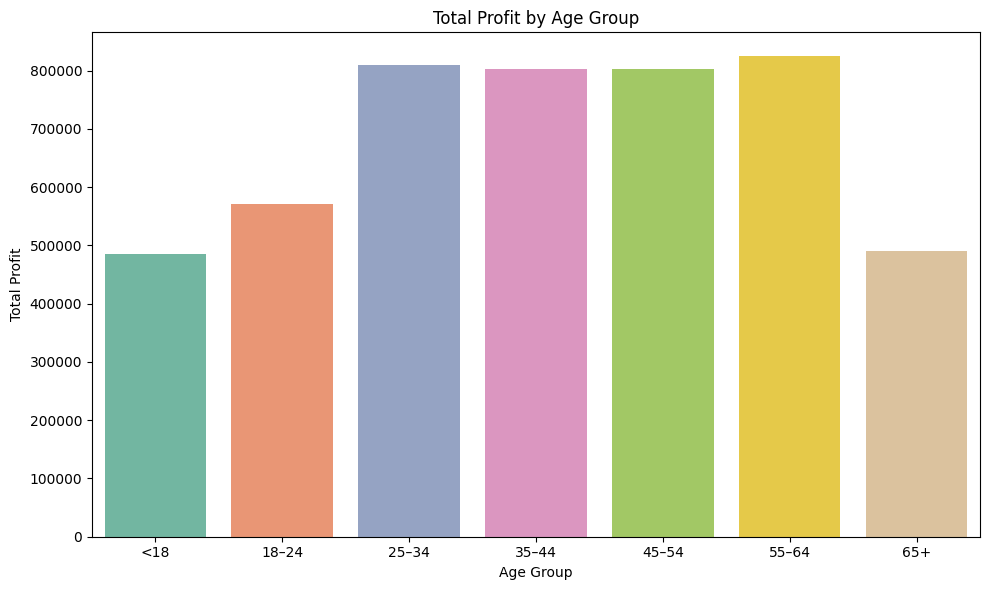

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=age_profile, x='age_group', y='total_profit', palette='Set2')
plt.title('Total Profit by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()

# **4. Which products generate the highest total revenue and profit?**

In [7]:
# Group by product name
product_performance = df.groupby(['product_id', 'name']).agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    times_sold=('order_items_id', 'count'),  # frequency of sales'
).reset_index()

# Top 10 products by profit
top_10_profit = product_performance.sort_values(by='total_profit', ascending=False).head(10)

# Bottom 10 products by profit
bottom_10_profit = product_performance.sort_values(by='total_profit', ascending=True).head(10)

# Top 10 products by revenue
top_10_revenue = product_performance.sort_values(by='total_revenue', ascending=False).head(10)

# Bottom 10 products by revenue
bottom_10_revenue = product_performance.sort_values(by='total_revenue', ascending=True).head(10)

# Top 10 products by sales volume
top_10_sales = product_performance.sort_values(by='times_sold', ascending=False).head(10)

# Bottom 10 products by sales volume
bottom_10_sales = product_performance.sort_values(by='times_sold', ascending=True).head(10)

**Distribution**

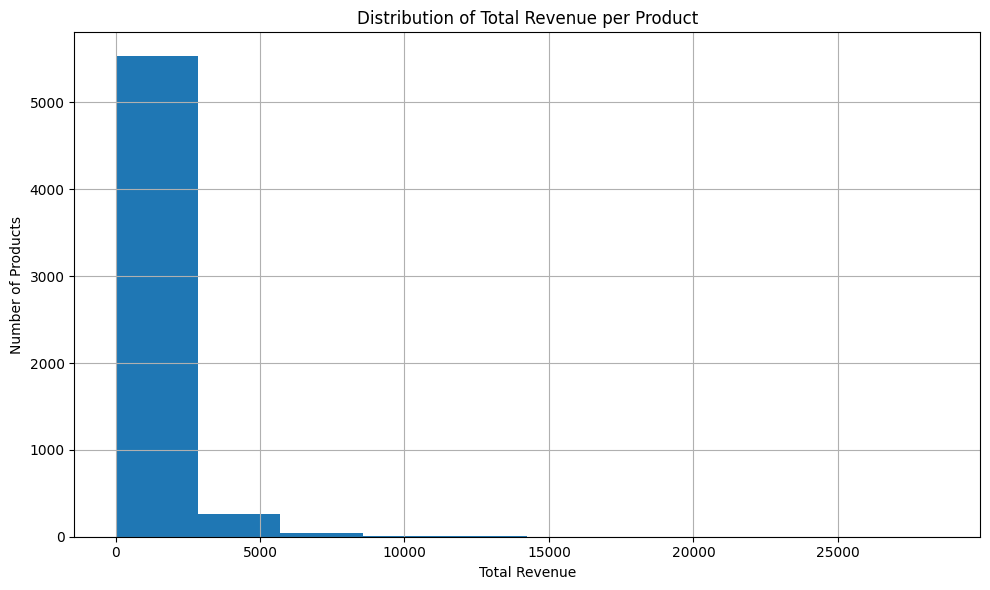

In [8]:
# Plot histogram of total revenue per product
plt.figure(figsize=(10, 6))
product_performance['total_revenue'].hist()
plt.title('Distribution of Total Revenue per Product')
plt.xlabel('Total Revenue')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()

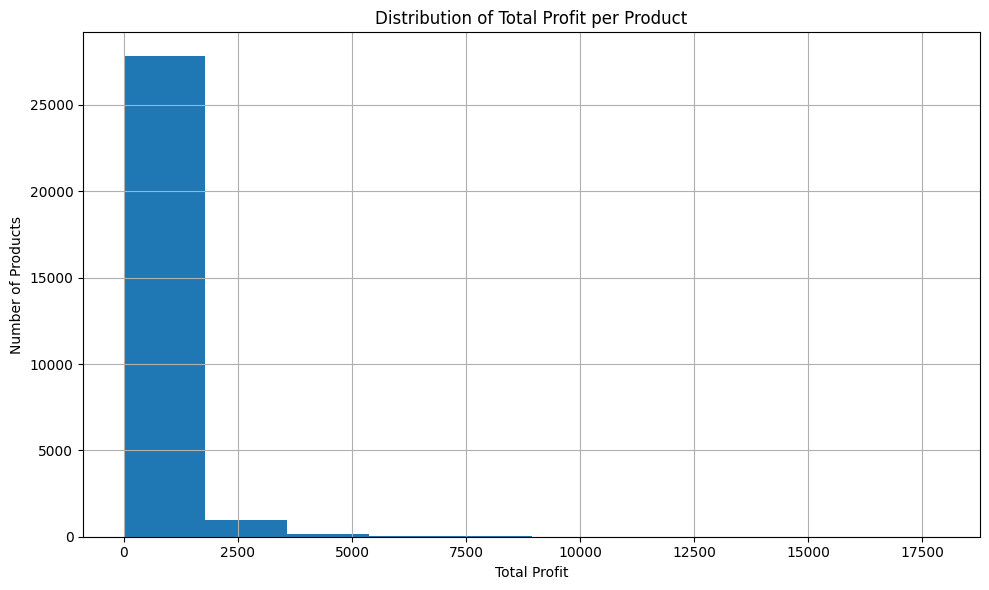

In [ ]:
# Plot histogram of total profit per product
plt.figure(figsize=(10, 6))
product_performance['total_profit'].hist()
plt.title('Distribution of Total Profit per Product')
plt.xlabel('Total Profit')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()

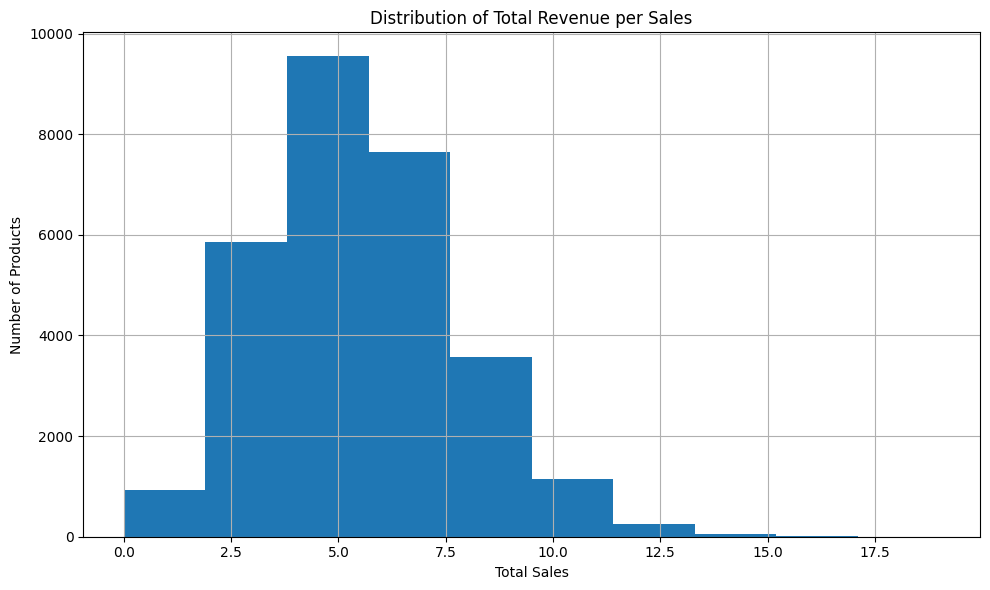

In [ ]:
# Plot histogram of total sales per product
plt.figure(figsize=(10, 6))
product_performance['times_sold'].hist()
plt.title('Distribution of Total Revenue per Sales')
plt.xlabel('Total Sales')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()


**Product Performance By Revenue**

<ipython-input-512-d50c281c500f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y='name', data=top_10_revenue, palette='viridis')


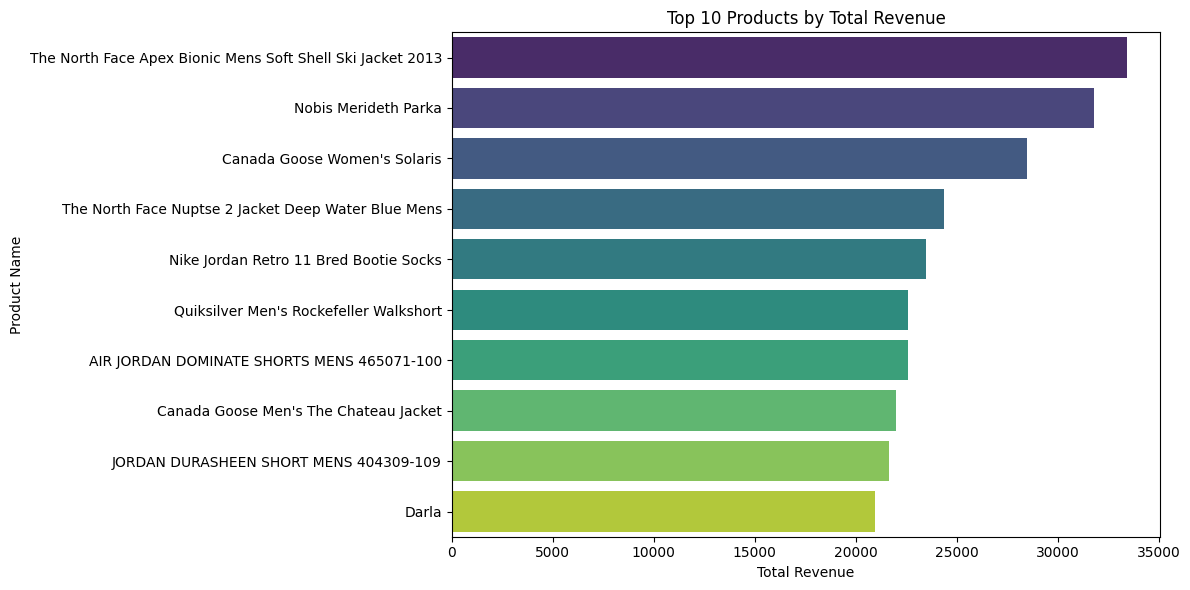

In [ ]:
# Plot: Top 10 Products by Revenue
plt.figure(figsize=(12, 6))
sns.barplot(x='total_revenue', y='name', data=top_10_revenue, palette='viridis')
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

<ipython-input-513-b4b25a99f6c1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y='name', data=bottom_10_revenue, palette='coolwarm')


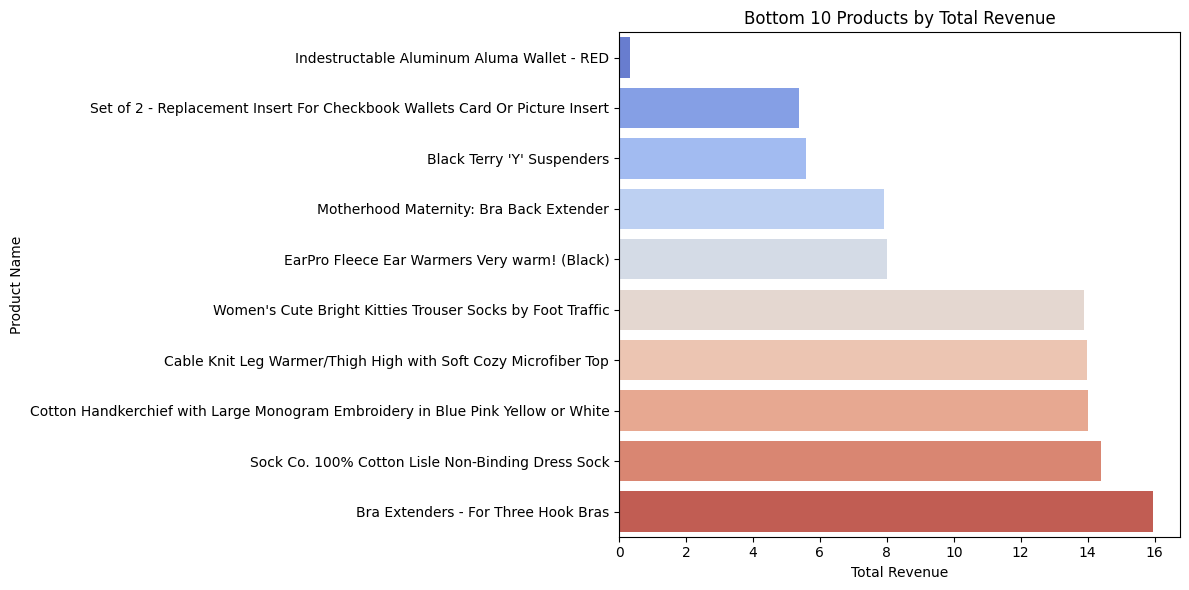

In [ ]:
# Plot: Bottom 10 Products by Revenue
plt.figure(figsize=(12, 6))
sns.barplot(x='total_revenue', y='name', data=bottom_10_revenue, palette='coolwarm')
plt.title('Bottom 10 Products by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

**Product Performance By Profit**

<ipython-input-514-e4463d638ecc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_profit', y='name', data=top_10_profit, palette='viridis')


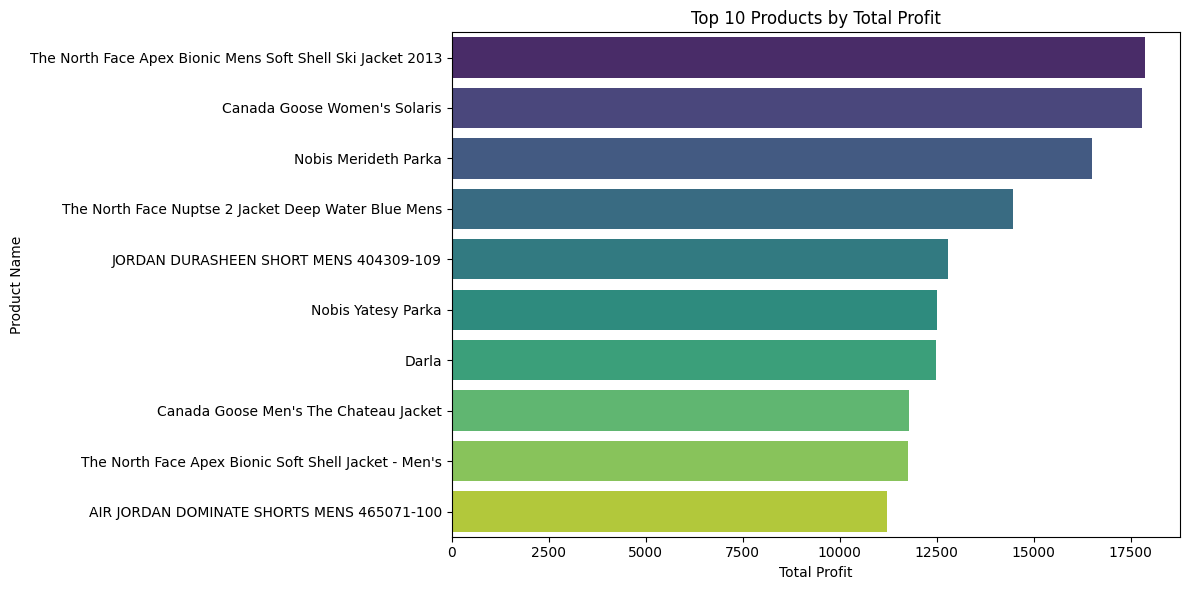

In [ ]:
# Plot: Top 10 Products by Profit
plt.figure(figsize=(12, 6))
sns.barplot(x='total_profit', y='name', data=top_10_profit, palette='viridis')
plt.title('Top 10 Products by Total Profit')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

<ipython-input-515-f71225429d29>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_profit', y='name', data=bottom_10_profit, palette='coolwarm')


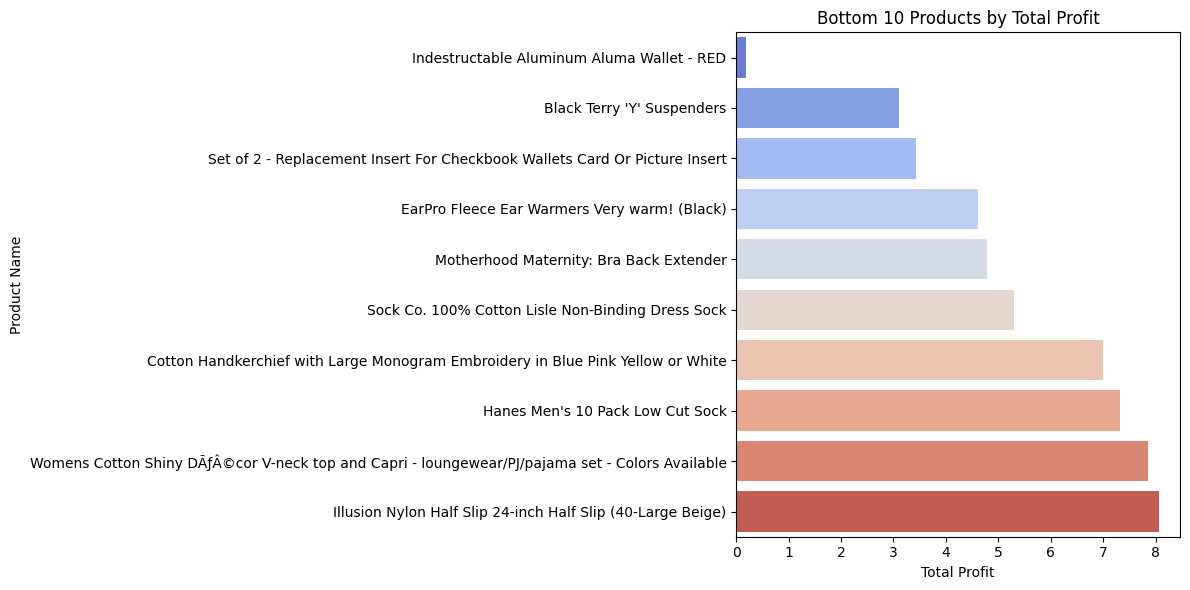

In [ ]:
# Plot: Bottom 10 Products by Profit
plt.figure(figsize=(12, 6))
sns.barplot(x='total_profit', y='name', data=bottom_10_profit, palette='coolwarm')
plt.title('Bottom 10 Products by Total Profit')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

**Product Performance By Sales**

<ipython-input-516-a235afe5f184>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='times_sold', y='name', data=top_10_sales, palette='coolwarm')


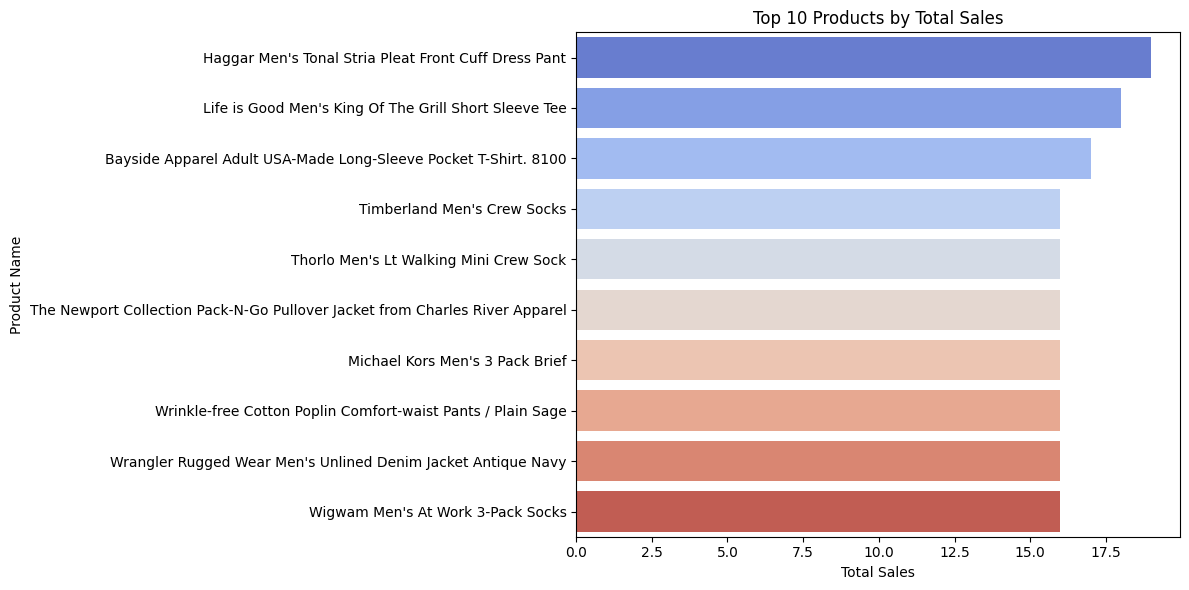

In [ ]:
# Plot: Top 10 Products by Sales

plt.figure(figsize=(12, 6))
sns.barplot(x='times_sold', y='name', data=top_10_sales, palette='coolwarm')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


<ipython-input-517-f4a7ef6004d8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='times_sold', y='name', data=bottom_10_sales, palette='coolwarm')


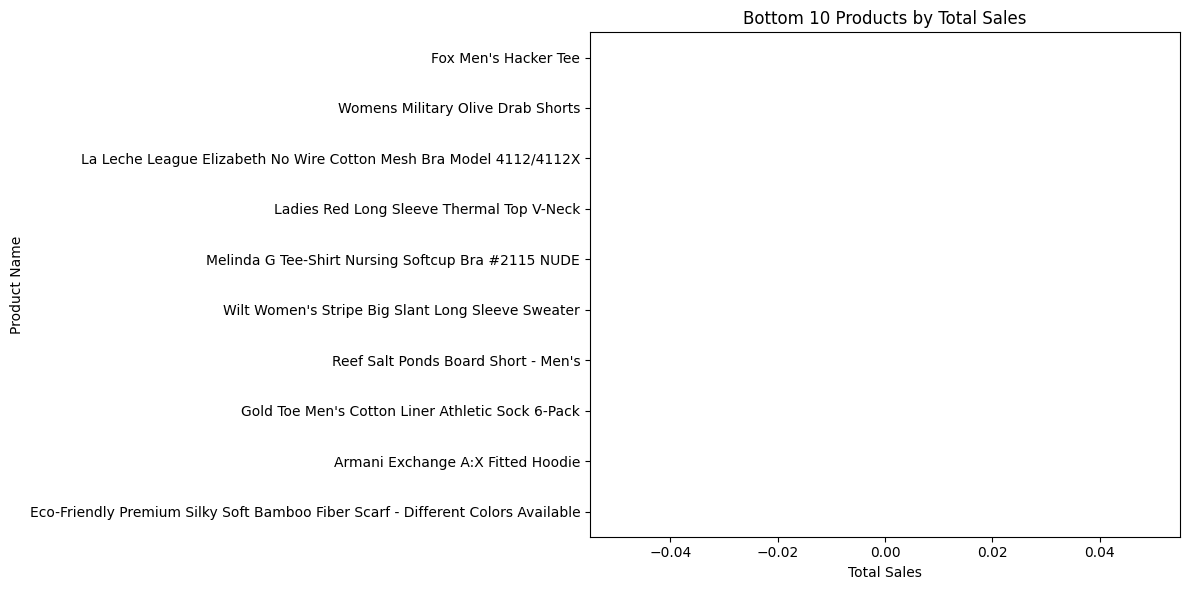

In [ ]:
# Plot: Bottom 10 Products by Sales

plt.figure(figsize=(12, 6))
sns.barplot(x='times_sold', y='name', data=bottom_10_sales, palette='coolwarm')
plt.title('Bottom 10 Products by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


# **5. Which product categories generate the highest and lowest total sales volume, revenue and profit?**


In [ ]:
# Group by product name
category_performance = df.groupby('category').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    times_sold=('order_items_id', 'count')  # frequency of sales
).reset_index()

# Top 10 categories by profit
top_10_profit = category_performance.sort_values(by='total_profit', ascending=False).head(10)

# Bottom 10 categories by profit
bottom_10_profit = category_performance.sort_values(by='total_profit', ascending=True).head(10)

# Top 10 categories by revenue
top_10_revenue = category_performance.sort_values(by='total_revenue', ascending=False).head(10)

# Bottom 10 categories by revenue
bottom_10_revenue = category_performance.sort_values(by='total_revenue', ascending=True).head(10)

# Top 10 categories by sales volume
top_10_sales = category_performance.sort_values(by='times_sold', ascending=False).head(10)

# Bottom 10 categories by sales volume
bottom_10_sales = category_performance.sort_values(by='times_sold', ascending=True).head(10)

<ipython-input-519-3664b5bb6ac8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y='category', data=top_10_revenue, palette='viridis')


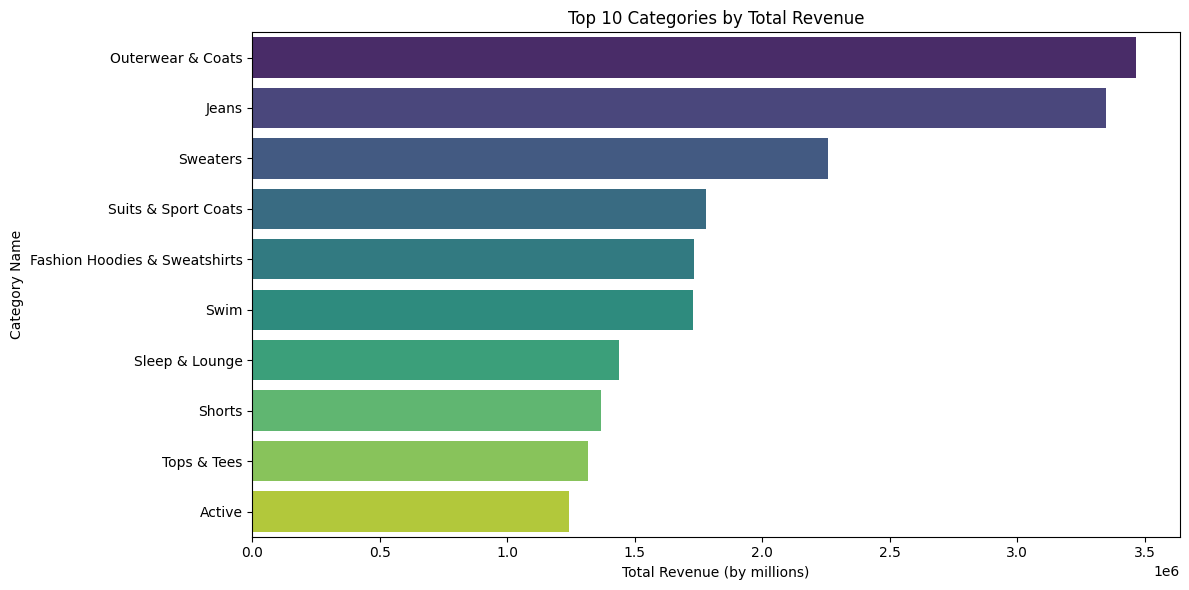

In [ ]:
# Plot: Top 10 Categories by Revenue

plt.figure(figsize=(12, 6))
sns.barplot(x='total_revenue', y='category', data=top_10_revenue, palette='viridis')
plt.title('Top 10 Categories by Total Revenue')
plt.xlabel('Total Revenue (by millions)')
plt.ylabel('Category Name')
plt.tight_layout()
plt.show()

<ipython-input-520-0e109ed8dcab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y='category', data=bottom_10_revenue, palette='viridis')


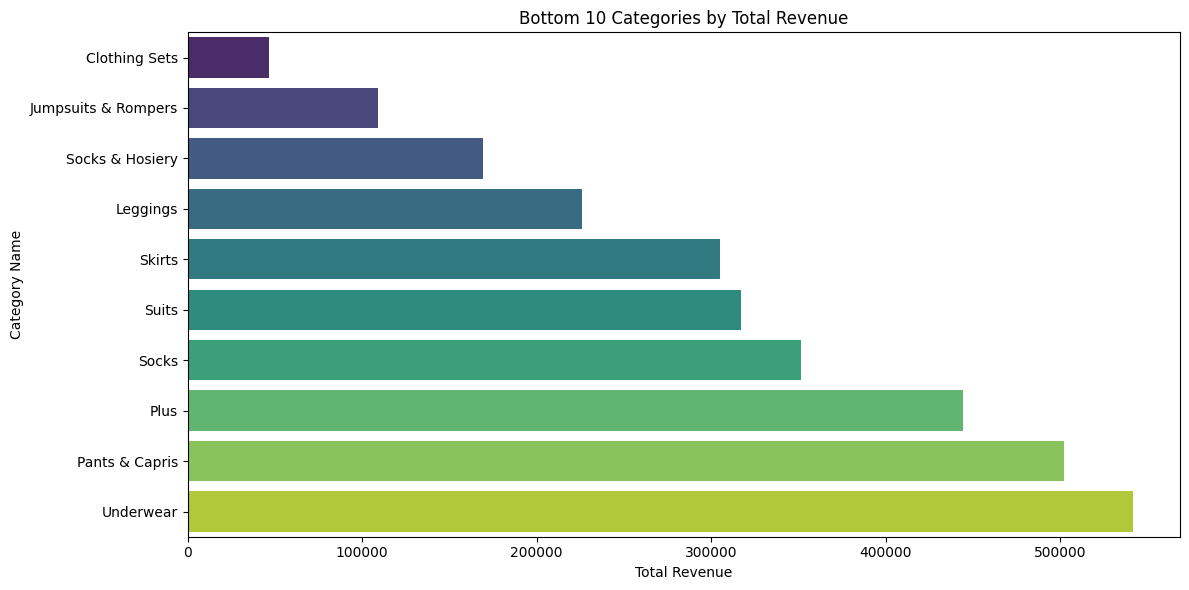

In [ ]:
# Plot: Bottom 10 Categories by Revenue

plt.figure(figsize=(12, 6))
sns.barplot(x='total_revenue', y='category', data=bottom_10_revenue, palette='viridis')
plt.title('Bottom 10 Categories by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Category Name')
plt.tight_layout()
plt.show()

<ipython-input-521-cbd762f7b975>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_profit', y='category', data=top_10_profit, palette='viridis')


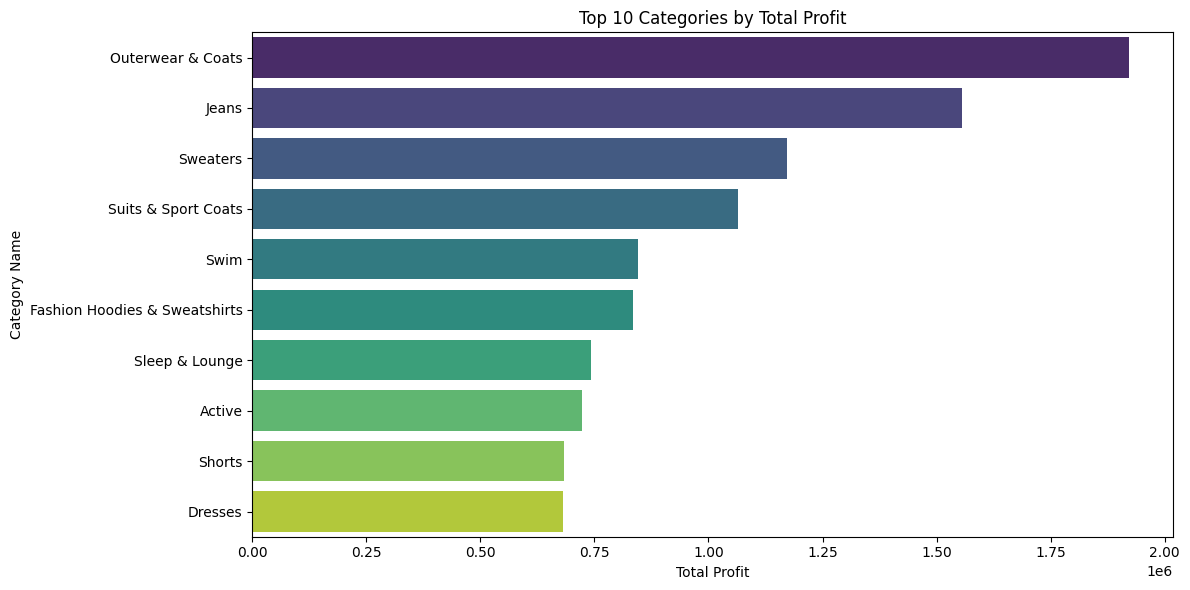

In [ ]:
# Plot: Top 10 Categories by Profit

plt.figure(figsize=(12, 6))
sns.barplot(x='total_profit', y='category', data=top_10_profit, palette='viridis')
plt.title('Top 10 Categories by Total Profit')
plt.xlabel('Total Profit')
plt.ylabel('Category Name')
plt.tight_layout()
plt.show()

<ipython-input-522-2def25165448>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_profit', y='category', data=bottom_10_profit, palette='viridis')


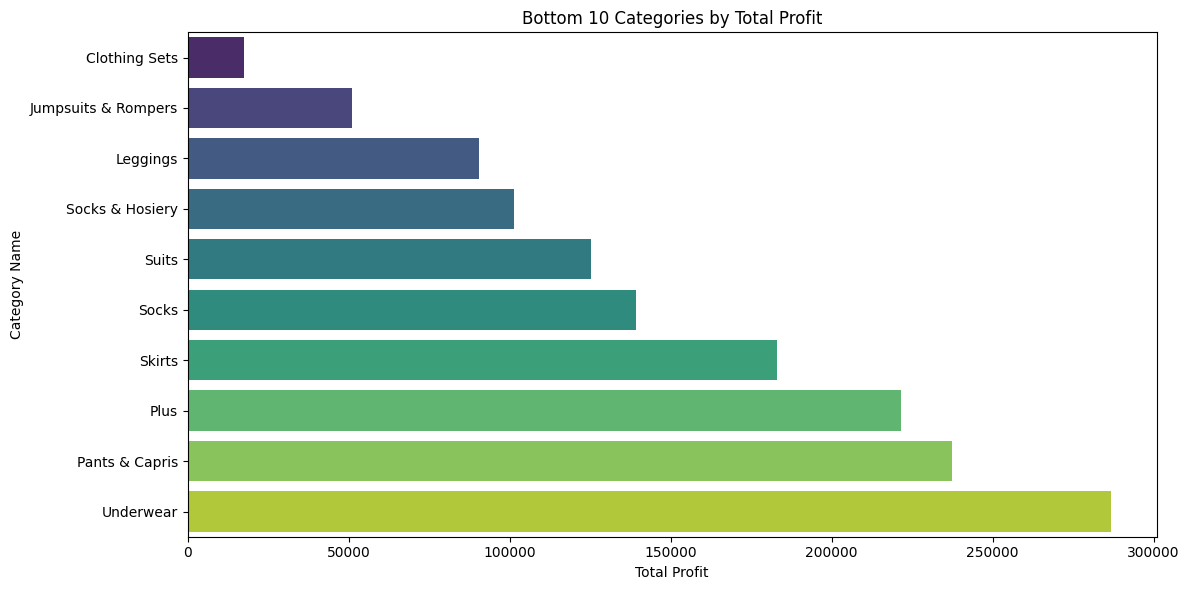

In [ ]:
# Plot: Bottom 10 Categories by Profit

plt.figure(figsize=(12, 6))
sns.barplot(x='total_profit', y='category', data=bottom_10_profit, palette='viridis')
plt.title('Bottom 10 Categories by Total Profit')
plt.xlabel('Total Profit')
plt.ylabel('Category Name')
plt.tight_layout()
plt.show()

<ipython-input-523-159f9a3e2ecb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='times_sold', y='category', data=top_10_sales, palette='viridis')


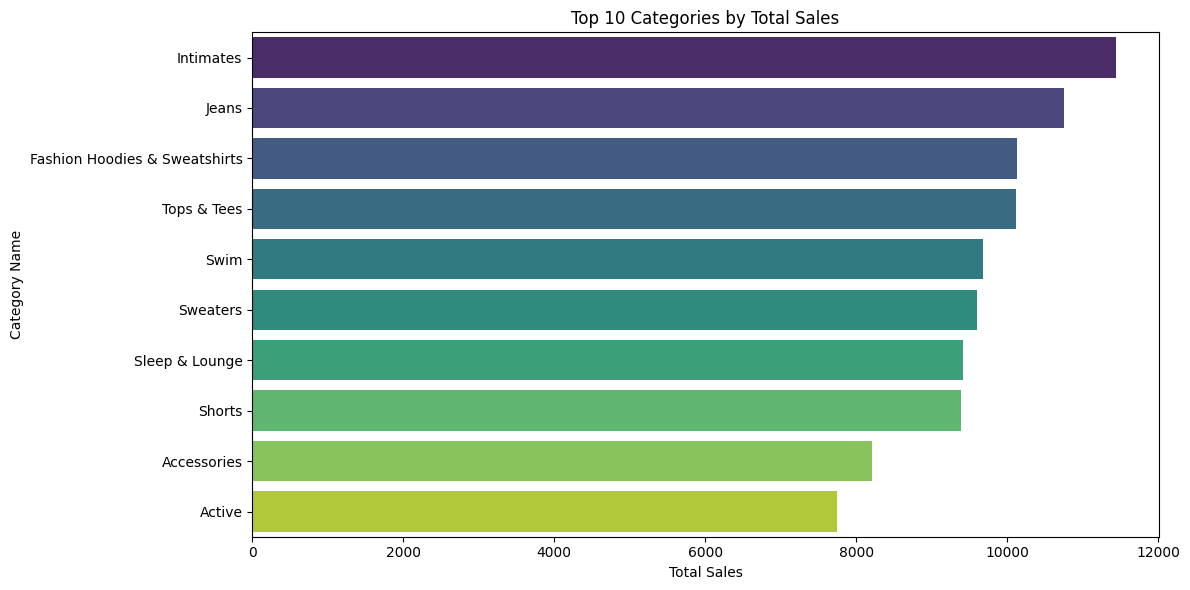

In [ ]:
# Plot: Top 10 Categories by Sales

plt.figure(figsize=(12, 6))
sns.barplot(x='times_sold', y='category', data=top_10_sales, palette='viridis')
plt.title('Top 10 Categories by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Category Name')
plt.tight_layout()
plt.show()

<ipython-input-524-d420782f54c9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='times_sold', y='category', data=bottom_10_sales, palette='viridis')


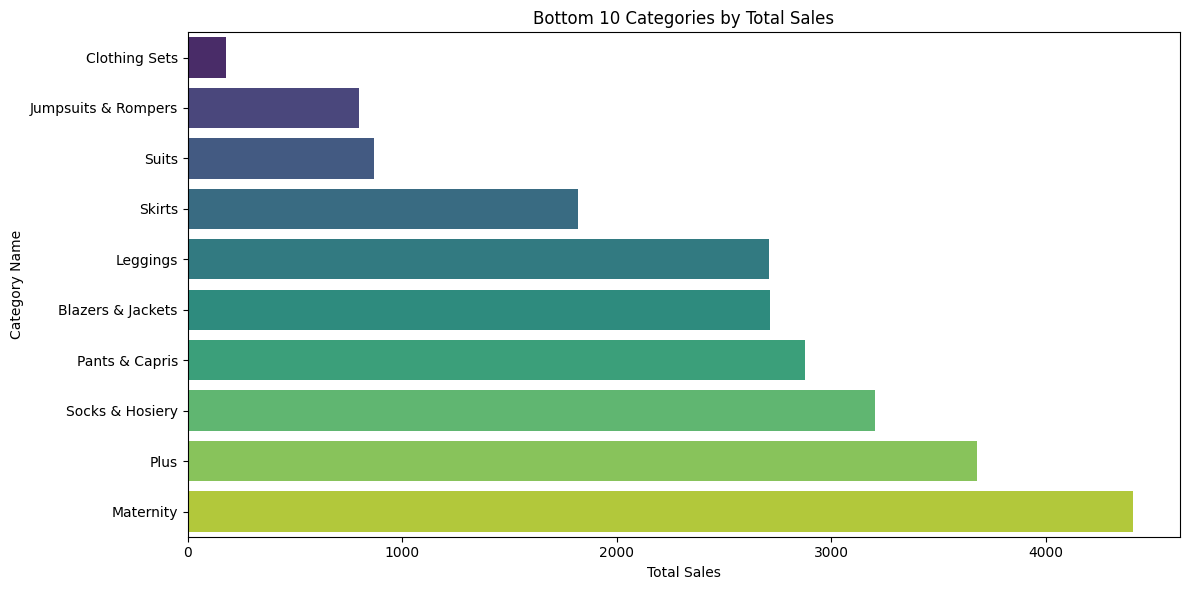

In [ ]:
# Plot: Bottom 10 Categories by Sales

plt.figure(figsize=(12, 6))
sns.barplot(x='times_sold', y='category', data=bottom_10_sales, palette='viridis')
plt.title('Bottom 10 Categories by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Category Name')
plt.tight_layout()
plt.show()

# **6. Which product brands generate the highest and lowest total sales volume, revenue and profit?**


In [ ]:
# Group by product name
brand_performance = df.groupby('brand').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    times_sold=('order_items_id', 'count')  # frequency of sales
).reset_index()

# Top 10 categories by profit
top_10_profit = brand_performance.sort_values(by='total_profit', ascending=False).head(10)

# Bottom 10 categories by profit
bottom_10_profit = brand_performance.sort_values(by='total_profit', ascending=True).head(10)

# Top 10 categories by revenue
top_10_revenue = brand_performance.sort_values(by='total_revenue', ascending=False).head(10)

# Bottom 10 categories by revenue
bottom_10_revenue = brand_performance.sort_values(by='total_revenue', ascending=True).head(10)

# Top 10 categories by sales volume
top_10_sales = brand_performance.sort_values(by='times_sold', ascending=False).head(10)

# Bottom 10 categories by sales volume
bottom_10_sales = brand_performance.sort_values(by='times_sold', ascending=True).head(10)

<ipython-input-526-b440a3acc1b5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y='brand', data=top_10_revenue, palette='viridis')


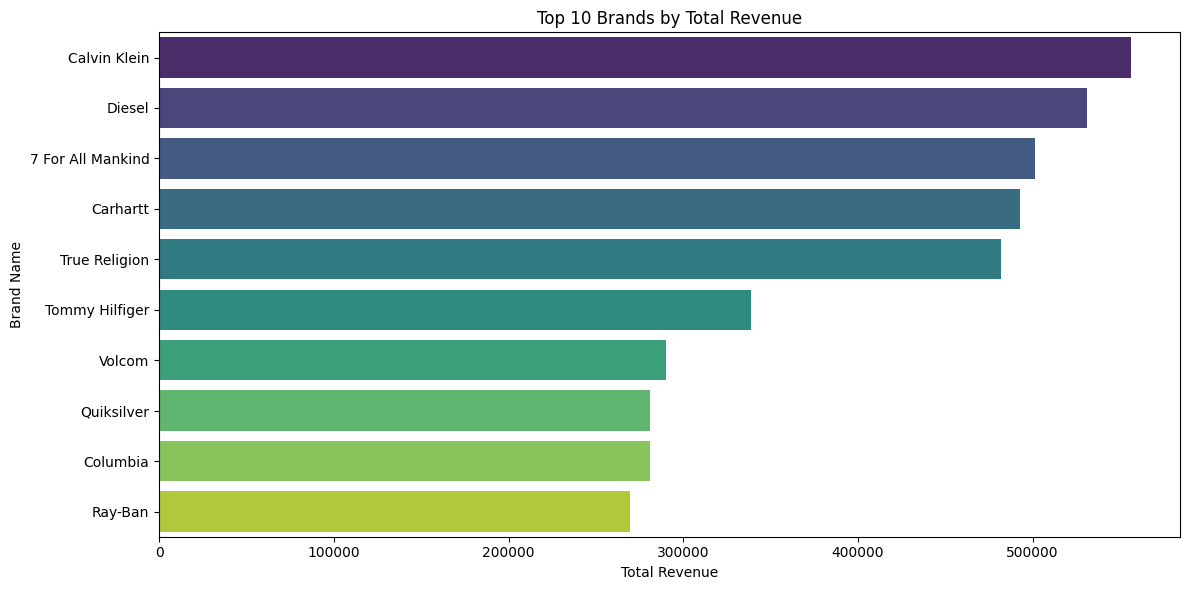

In [ ]:
# Plot: Top 10 Brands by Revenue

plt.figure(figsize=(12, 6))
sns.barplot(x='total_revenue', y='brand', data=top_10_revenue, palette='viridis')
plt.title('Top 10 Brands by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Brand Name')
plt.tight_layout()
plt.show()

<ipython-input-527-edf612161ae0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y='brand', data=bottom_10_revenue, palette='viridis')


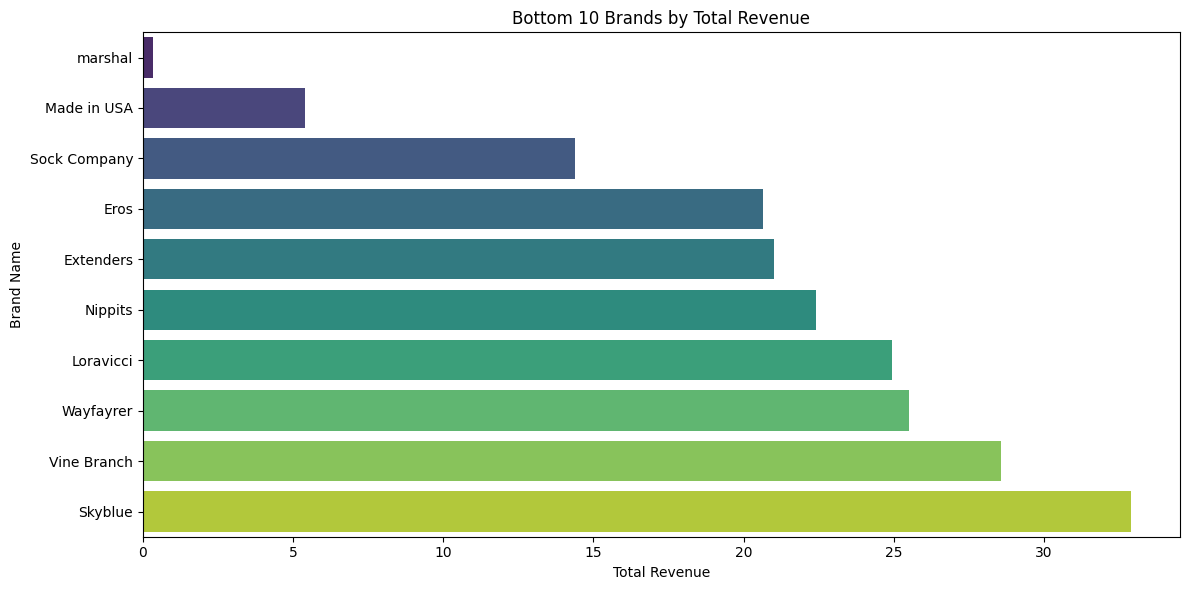

In [ ]:
# Plot: Bottom 10 Brands by Revenue

plt.figure(figsize=(12, 6))
sns.barplot(x='total_revenue', y='brand', data=bottom_10_revenue, palette='viridis')
plt.title('Bottom 10 Brands by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Brand Name')
plt.tight_layout()
plt.show()

<ipython-input-528-5254c45c3791>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_profit', y='brand', data=top_10_profit, palette='viridis')


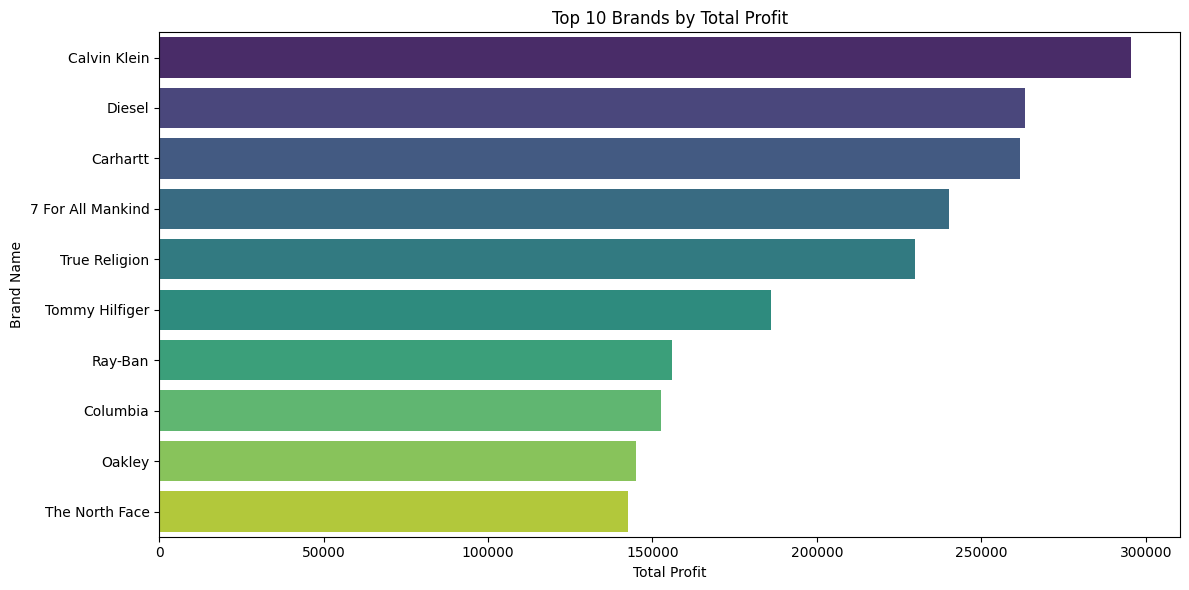

In [ ]:
# Plot: Top 10 Brands by Profit

plt.figure(figsize=(12, 6))
sns.barplot(x='total_profit', y='brand', data=top_10_profit, palette='viridis')
plt.title('Top 10 Brands by Total Profit')
plt.xlabel('Total Profit')
plt.ylabel('Brand Name')
plt.tight_layout()
plt.show()

<ipython-input-529-fd04e23130f2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_profit', y='brand', data=bottom_10_profit, palette='viridis')


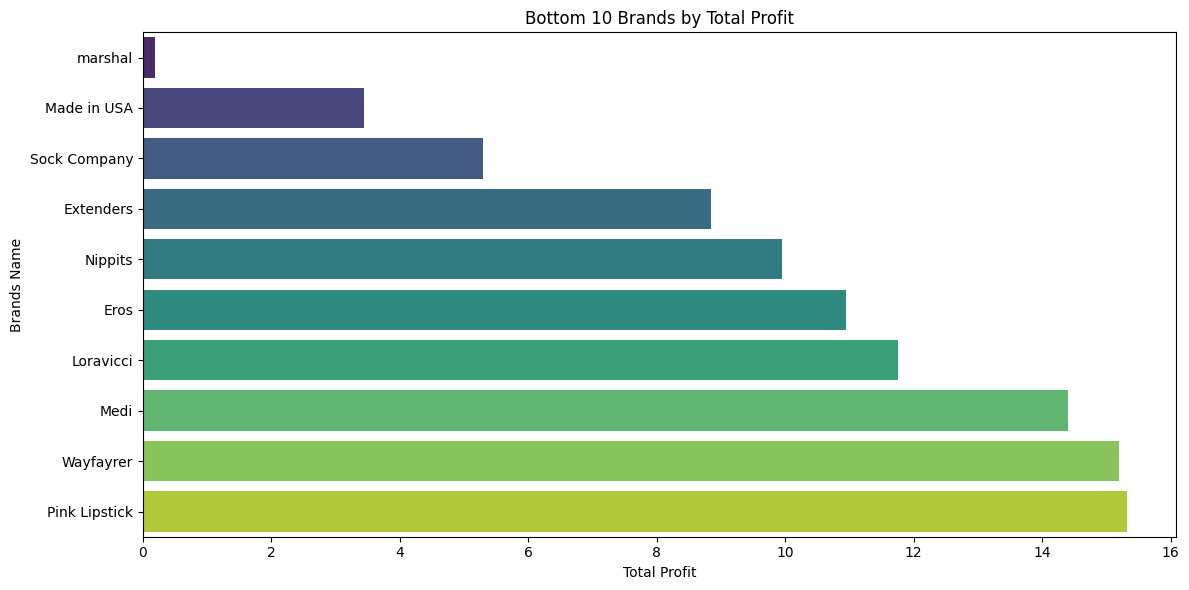

In [ ]:
# Plot: Bottom 10 Brands by Profit

plt.figure(figsize=(12, 6))
sns.barplot(x='total_profit', y='brand', data=bottom_10_profit, palette='viridis')
plt.title('Bottom 10 Brands by Total Profit')
plt.xlabel('Total Profit')
plt.ylabel('Brands Name')
plt.tight_layout()
plt.show()

<ipython-input-530-1c4b4a139ca0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='times_sold', y='brand', data=top_10_sales, palette='viridis')


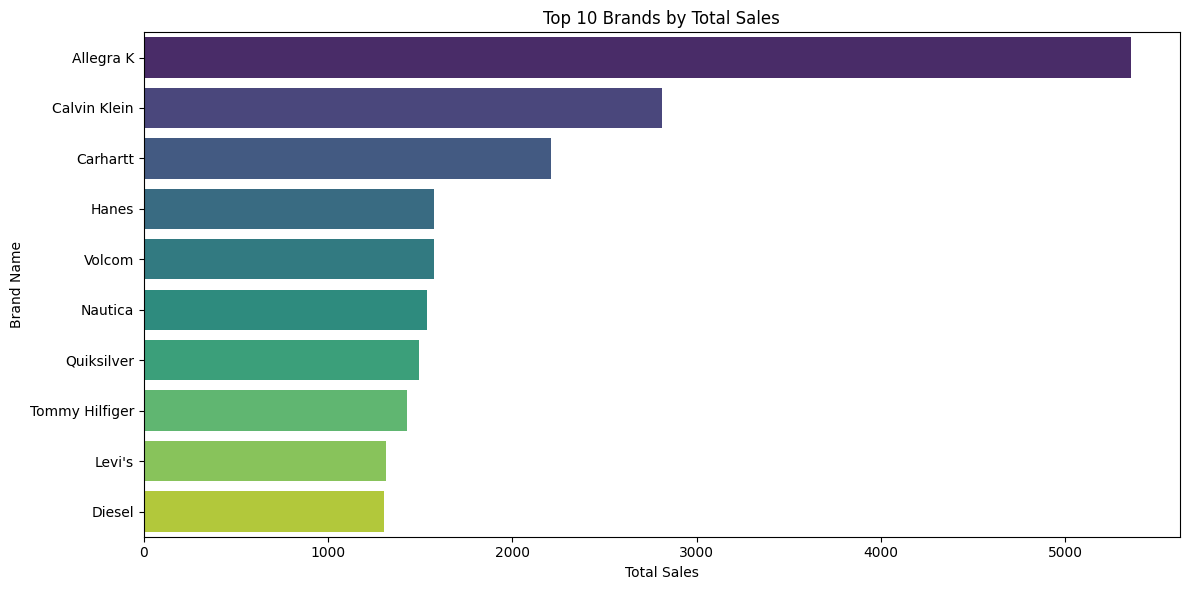

In [ ]:
# Plot: Top 10 Brands by Sales

plt.figure(figsize=(12, 6))
sns.barplot(x='times_sold', y='brand', data=top_10_sales, palette='viridis')
plt.title('Top 10 Brands by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Brand Name')
plt.tight_layout()
plt.show()

<ipython-input-531-8b4785bff1ec>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='times_sold', y='brand', data=bottom_10_sales, palette='viridis')


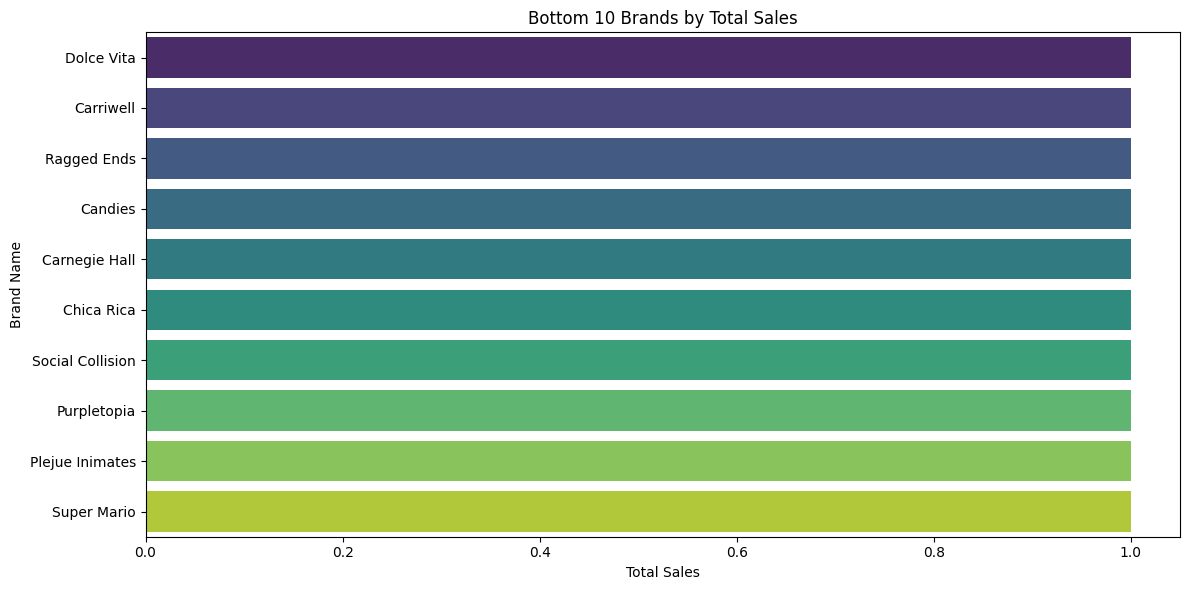

In [ ]:
# Plot: Bottom 10 Brands by Sales

plt.figure(figsize=(12, 6))
sns.barplot(x='times_sold', y='brand', data=bottom_10_sales, palette='viridis')
plt.title('Bottom 10 Brands by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Brand Name')
plt.tight_layout()
plt.show()

# **7. What is the sold-stocked ratio (sold versus stocked) per product?**


In [ ]:
# Quantity Stocked = unique inventory items per product
stocked = df[['product_id', 'inventory_item_id']].drop_duplicates()
stocked_count = stocked.groupby('product_id').agg(
    quantity_stocked=('inventory_item_id', 'count')
).reset_index()

# Quantity Sold = only rows where inventory_item_id is linked to an order
sold = df[~df['order_items_id'].isna()]
sold_count = sold.groupby('product_id').agg(
    quantity_sold=('order_items_id', 'count')
).reset_index()

# Merge
sell_through = pd.merge(stocked_count, sold_count, on='product_id', how='left')

# Fill unsold with 0
sell_through['quantity_sold'] = sell_through['quantity_sold'].fillna(0)

# Compute sell-through rate
sell_through['sell_through_rate'] = (sell_through['quantity_sold'] / sell_through['quantity_stocked']) * 100


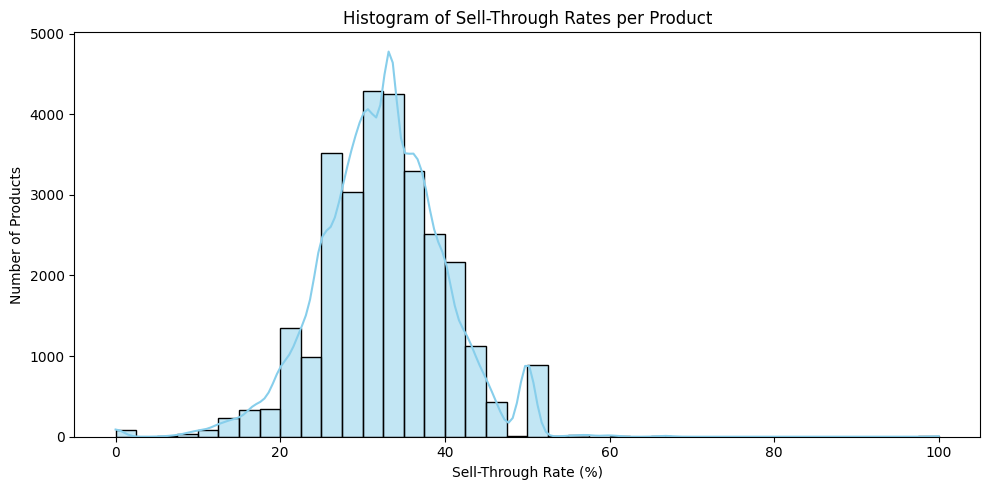

In [ ]:
# Step 3: Histogram
plt.figure(figsize=(10, 5))
sns.histplot(sell_through['sell_through_rate'], bins=40, kde=True, color='skyblue')
plt.title('Histogram of Sell-Through Rates per Product')
plt.xlabel('Sell-Through Rate (%)')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()

# **8. Which products are overstocked or have low conversion despite high inventory?**


In [ ]:
# Define STR buckets
bins = [0, 25, 50, 75, 100]
labels = ['0-25%', '25-50%', '50-75%', '75-100%']

sell_through['conversion_bucket'] = pd.cut(sell_through['sell_through_rate'], bins=bins, labels=labels, include_lowest=True)

# Count products in each bucket
bucket_counts = sell_through['conversion_bucket'].value_counts().sort_index().reset_index()
bucket_counts.columns = ['Sell-Through Rate Bucket', 'Number of Products']


# Step 3: Print the table
print(bucket_counts.to_string(index=False))

Sell-Through Rate Bucket  Number of Products
                   0-25%                5039
                  25-50%               23947
                  50-75%                  55
                 75-100%                   5


<ipython-input-535-6bee5d831aa2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sell-Through Rate Bucket', y='Number of Products', data=bucket_counts, palette='Spectral')


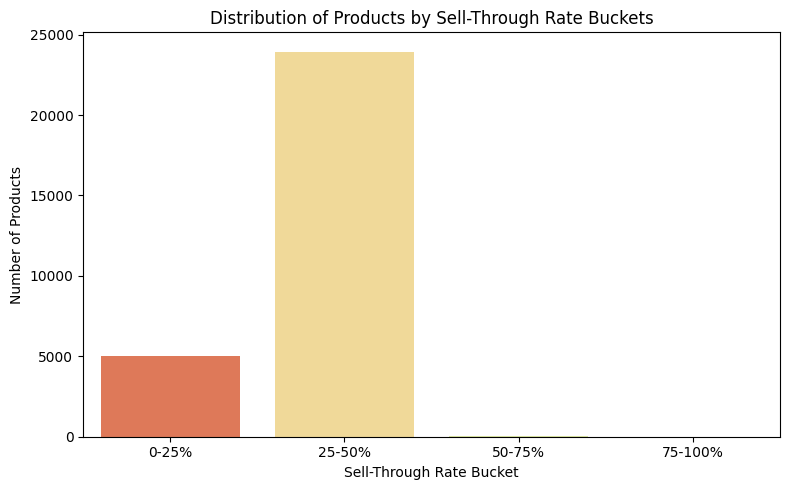

In [ ]:
# Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Sell-Through Rate Bucket', y='Number of Products', data=bucket_counts, palette='Spectral')
plt.title('Distribution of Products by Sell-Through Rate Buckets')
plt.xlabel('Sell-Through Rate Bucket')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()

# **9. Are there products with zero or near-zero sales that should be deprioritized?**


In [ ]:
# Count of zero-sale products
zero_sales_count = (sell_through['quantity_sold'] == 0).sum()

# Count of near-zero sell-through products (<10%) with at least 10 stocked
near_zero_sales_count = sell_through[
    (sell_through['sell_through_rate'] < 10) &
    (sell_through['quantity_sold'] > 0) &
    (sell_through['quantity_stocked'] >= 10)
].shape[0]

# Total unique deprioritized products
total_deprioritized = zero_sales_count + near_zero_sales_count

# Print results
print(f"Products with zero sales: {zero_sales_count}")
print(f"Products with near-zero sales (<10% STR): {near_zero_sales_count}")
print(f"Total products to consider for deprioritization: {total_deprioritized}")

Products with zero sales: 87
Products with near-zero sales (<10% STR): 42
Total products to consider for deprioritization: 129


# **10. K-Means Clustering: Determining Product Profiles**

In [ ]:
# Aggregate by product_id and name (if available)
product_summary = df.groupby(['product_id', 'name']).agg(
    total_stocked=('inventory_item_id', 'count'),
    total_sold=('order_items_id', 'count'),
    total_profit=('profit', 'sum'),
    total_revenue=('revenue', 'sum')
).reset_index()


In [ ]:
product_summary.columns

Index(['product_id', 'name', 'total_stocked', 'total_sold', 'total_profit',
       'total_revenue'],
      dtype='object')

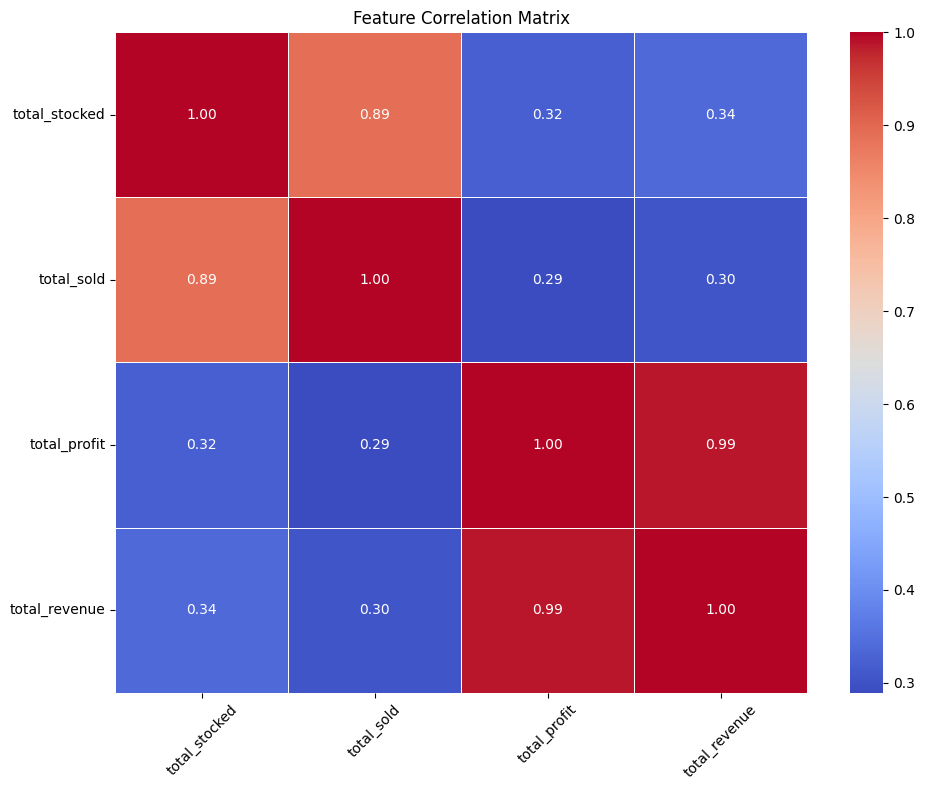

In [ ]:
# Compute correlation matrix
corr_matrix = product_summary[['total_stocked', 'total_sold', 'total_profit', 'total_revenue']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# drop total revenue (highly correlated with total profit)
product_summary = product_summary.drop(columns=['total_revenue'])

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from itertools import combinations


# Step 2: Prepare features
features = ['total_sold', 'total_profit', 'total_stocked']
X = product_summary[features]
X_scaled = StandardScaler().fit_transform(X)

# Step 3: Try KMeans for k = 2 to 7
results = []

for k in range(2, 9):
    try:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
        results.append({
            'k': k,
            'score': score
        })
    except Exception as e:
        print(f"Skipping k={k} due to error: {e}")

# Step 4: Compile and sort results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='score', ascending=False).reset_index(drop=True)

# Step 5: Print sorted k results
print("🔝 Top k values based on silhouette score:\n")
for i, row in results_df.iterrows():
    print(f"Rank {i+1} | k = {row['k']} | Score = {row['score']:.4f}")


🔝 Top k values based on silhouette score:

Rank 1 | k = 3.0 | Score = 0.4417
Rank 2 | k = 2.0 | Score = 0.4386
Rank 3 | k = 4.0 | Score = 0.4324
Rank 4 | k = 5.0 | Score = 0.3878
Rank 5 | k = 6.0 | Score = 0.3384
Rank 6 | k = 7.0 | Score = 0.3084
Rank 7 | k = 8.0 | Score = 0.2741


In [ ]:
# Fit KMeans with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
product_summary['cluster'] = kmeans.fit_predict(X_scaled)

# View cluster centers
# Define scaler
scaler = StandardScaler()
scaler.fit(X) # fit the scaler to your original data
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
print("Cluster Centers:\n", cluster_centers)

Cluster Centers:
    total_sold  total_profit  total_stocked
0    7.387039    550.577727      22.925408
1    3.705086    318.666093      11.820100
2    7.418542   3081.737369      23.915392
